# MNIST Implementation

## Robustness and Privacy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0))

cpu


In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
  root = 'data',
  train = True,
  transform = ToTensor(),
  download = True
)
test_data = datasets.MNIST(
  root = 'data',
  train = False,
  transform = ToTensor(),
  download = True
)
print(train_data)
print(train_data.data.size())
print(test_data)
print(test_data.data.size())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([10000, 28, 28])


Example of a sample

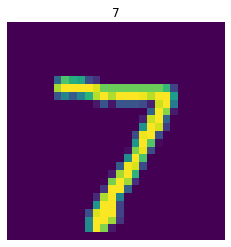

In [ ]:
import matplotlib.pyplot as plt
i = 0
plt.imshow(test_data.data[i])
plt.title('%d' % test_data.targets[i])
plt.axis('off')
plt.show()

Examples of more samples

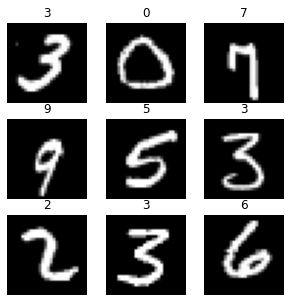

In [ ]:
figure = plt.figure(figsize=(5,5))
cols, rows = 3, 3
for i in range(1,cols*rows+1):
  j = torch.randint(len(test_data), size=(1,)).item()
  img, label = test_data[j]
  figure.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title('%d' % label)
  plt.axis('off')
plt.show()

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : DataLoader(train_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers= 1),
    'test'  : DataLoader(test_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers= 1)
}

In [ ]:
import torch.nn as nn
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(1,16,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(2))
    self.conv2 = nn.Sequential(
        nn.Conv2d(16,32,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(2))
    self.out = nn.Linear(32*7*7,10)
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0),-1)
    x = self.out(x)
    return x
cnn = CNN().to(device)
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
print(loss_func)

CrossEntropyLoss()


In [ ]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(),
                      lr = 0.01)
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [ ]:
import time
from torch.autograd import Variable
def train(num_epoch, cnn, loaders):
  cnn.train()
  t = time.time()
  for epoch in range(num_epoch):
    for i, (img, labels) in enumerate(loaders['train']):
      x = Variable(img).to(device)
      y = Variable(labels).to(device)
      output = cnn(x)
      loss = loss_func(output,y.to(device))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if (i+1)%100 == 0:
        elapsed = time.time() - t 
        print('Epoch: [{}/{}] - Batch: [{}/{}] - Loss: {:.4f} - Time: {:.1f}'.
              format(epoch+1,num_epoch,i+1,len(loaders['train']),loss.item(),elapsed))
        t = time.time()
num_epoch = 10
train(num_epoch,cnn,loaders)

Epoch: [1/10] - Batch: [100/600] - Loss: 0.1231 - Time: 12.6
Epoch: [1/10] - Batch: [200/600] - Loss: 0.0856 - Time: 15.4
Epoch: [1/10] - Batch: [300/600] - Loss: 0.0836 - Time: 6.0
Epoch: [1/10] - Batch: [400/600] - Loss: 0.1056 - Time: 6.0
Epoch: [1/10] - Batch: [500/600] - Loss: 0.0269 - Time: 6.0
Epoch: [1/10] - Batch: [600/600] - Loss: 0.0572 - Time: 6.0
Epoch: [2/10] - Batch: [100/600] - Loss: 0.0645 - Time: 6.1
Epoch: [2/10] - Batch: [200/600] - Loss: 0.0565 - Time: 6.0
Epoch: [2/10] - Batch: [300/600] - Loss: 0.0107 - Time: 6.1
Epoch: [2/10] - Batch: [400/600] - Loss: 0.0205 - Time: 6.1
Epoch: [2/10] - Batch: [500/600] - Loss: 0.0324 - Time: 6.0
Epoch: [2/10] - Batch: [600/600] - Loss: 0.0545 - Time: 6.0
Epoch: [3/10] - Batch: [100/600] - Loss: 0.0622 - Time: 6.1
Epoch: [3/10] - Batch: [200/600] - Loss: 0.0554 - Time: 7.1
Epoch: [3/10] - Batch: [300/600] - Loss: 0.0378 - Time: 6.0
Epoch: [3/10] - Batch: [400/600] - Loss: 0.0189 - Time: 6.1
Epoch: [3/10] - Batch: [500/600] - Los

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
actual_y_test = []
predicted_y_test = []
with torch.no_grad():
    for (images, labels) in loaders['test']:
        images, labels = images.to(device), labels.to(device)
        test_output = cnn(images)
        pred_y = torch.max(test_output,1)[1].data.squeeze()
        actual_y_test += labels.tolist()
        predicted_y_test += pred_y.tolist()
print(confusion_matrix(actual_y_test,predicted_y_test))
print(f"Accuracy of the CNN: {accuracy_score(actual_y_test,predicted_y_test)}")

[[ 974    0    0    0    0    0    3    1    0    2]
 [   2 1124    2    0    0    3    4    0    0    0]
 [   1    9 1007    1    0    1    2    8    3    0]
 [   0    1    1  983    0   18    0    3    1    3]
 [   0    0    2    0  951    0    3    1    1   24]
 [   1    0    1    3    0  880    3    0    1    3]
 [   4    3    0    0    0    1  948    0    2    0]
 [   0    6    4    0    2    1    0 1008    2    5]
 [   5    0    2    2    0    2    1    1  952    9]
 [   0    2    1    0    3    2    0    2    1  998]]
Accuracy of the CNN: 0.9825


## Robustness

Fast Gradient Sign Method (White Box method)

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

test_loader = DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=True)

In [ ]:
epsilons = [0, .05, .1, .15, .2, .25, .3]

In [ ]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

def test_robustness(model, device, test_loader, epsilon):

    # Accuracy counter
    correct = 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in test_loader:

        # Send the data and label to the device
        data = data.to(device)
        target = target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        loss = F.nll_loss(output, target.to(device))

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data).to(device)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            # Special case for saving 0 epsilon examples
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples


In [ ]:
accuracies = []
examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test_robustness(cnn, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 9864 / 10000 = 0.9864
Epsilon: 0.05	Test Accuracy = 8241 / 10000 = 0.8241
Epsilon: 0.1	Test Accuracy = 5204 / 10000 = 0.5204
Epsilon: 0.15	Test Accuracy = 2997 / 10000 = 0.2997
Epsilon: 0.2	Test Accuracy = 1953 / 10000 = 0.1953
Epsilon: 0.25	Test Accuracy = 1471 / 10000 = 0.1471
Epsilon: 0.3	Test Accuracy = 1282 / 10000 = 0.1282


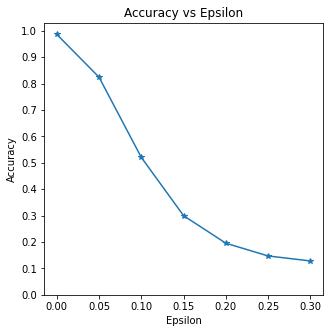

In [ ]:
import numpy as np

plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

Robustness on CIFAR with RobustBench (bisogno di modello callable, non va bene)

In [ ]:
!pip install git+https://github.com/RobustBench/robustbench.git

import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

In [ ]:
from robustbench.data import load_cifar10

x_test, y_test = load_cifar10(n_examples=50)

from robustbench.utils import load_model
print("Results on CIFAR-10:")
for model_name in ["Rebuffi2021Fixing_70_16_cutmix_extra", "Carmon2019Unlabeled",
                   "Chen2020Adversarial", "Standard"]:
    print("")
    print(f"Model name: {model_name}")
    model = load_model(model_name=model_name, dataset='cifar10', threat_model='Linf')
    model.to(device)

    # autoattack is installed as a dependency of robustbench so there is not need to install it separately
    from autoattack import AutoAttack
    adversary = AutoAttack(model, norm='Linf', eps=8/255, version='custom', attacks_to_run=['apgd-ce', 'apgd-dlr'])
    adversary.apgd.n_restarts = 1
    x_adv = adversary.run_standard_evaluation(x_test, y_test)

Files already downloaded and verified

Model name: Rebuffi2021Fixing_70_16_cutmix_extra
using custom version including apgd-ce, apgd-dlr
initial accuracy: 96.00%
apgd-ce - 1/1 - 17 out of 48 successfully perturbed
robust accuracy after APGD-CE: 62.00% (total time 145.0 s)
apgd-dlr - 1/1 - 3 out of 31 successfully perturbed
robust accuracy after APGD-DLR: 56.00% (total time 255.6 s)
max Linf perturbation: 0.03137, nan in tensor: 0, max: 1.00000, min: 0.00000
robust accuracy: 56.00%

Model name: Carmon2019Unlabeled
using custom version including apgd-ce, apgd-dlr
initial accuracy: 92.00%
apgd-ce - 1/1 - 18 out of 46 successfully perturbed
robust accuracy after APGD-CE: 56.00% (total time 22.9 s)
apgd-dlr - 1/1 - 2 out of 28 successfully perturbed
robust accuracy after APGD-DLR: 52.00% (total time 36.3 s)
max Linf perturbation: 0.03137, nan in tensor: 0, max: 1.00000, min: 0.00000
robust accuracy: 52.00%

Model name: Chen2020Adversarial
using custom version including apgd-ce, apgd-dlr
ini

Robustness on MNIST with SimBA

In [ ]:
! pip install adversarial-robustness-toolbox

In [ ]:
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

from art.attacks.evasion import SimBA
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import PyTorchClassifier
from art.estimators.classification import BlackBoxClassifierNeuralNetwork
from art.utils import load_mnist


# Step 0: Define the neural network model, return probabilities instead of logits in forward method

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1)
        self.conv_2 = nn.Conv2d(in_channels=4, out_channels=10, kernel_size=5, stride=1)
        self.fc_1 = nn.Linear(in_features=4 * 4 * 10, out_features=100)
        self.fc_2 = nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv_1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv_2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 10)
        x = F.relu(self.fc_1(x))
        x = F.softmax(self.fc_2(x), dim=1)
        return x


# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 1a: Swap axes to PyTorch's NCHW format

x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

# Step 2: Create the model

model = Net()

# Step 2a: Define the loss function and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Create the ART classifier


# def predict(x_test):
#     predicted_y_test = []
#     for x in x_test:
#         x_copy = x.reshape(28,28,1)
#         transform = ToTensor()
#         img = transform(x_copy)
#         img.to(device)
#         test_output = cnn(img)
#         pred_y = torch.max(test_output,1)[1].data.squeeze()
#         predicted_y_test += (x, pred_y)
#     return predicted_y_test


classifier = PyTorchClassifier(
    model=model,
    clip_values=(min_pixel_value, max_pixel_value),
    loss=criterion,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=10,
)

# Step 4: Train the ART classifier
classifier.fit(x_train, y_train, batch_size=100, nb_epochs=3)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = SimBA(classifier=classifier, max_iter=500)
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 94.63000000000001%


SimBA - sample:   0%|          | 0/10000 [00:00<?, ?it/s]

Accuracy on adversarial test examples: 94.21000000000001%


Accuracy on benign test examples: 97.78%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 0.2: 94.0%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 0.733: 91.2%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 1.267: 86.2%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 1.8: 78.60000000000001%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 2.333: 68.2%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 2.867: 55.400000000000006%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 3.4: 41.6%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 3.933: 28.000000000000004%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 4.467: 21.2%


SimBA - sample:   0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 adversarial test examples with epsilon 5.0: 15.2%


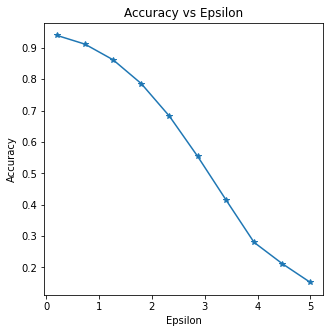

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

from art.attacks.evasion import SimBA
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import PyTorchClassifier
from art.estimators.classification import BlackBoxClassifierNeuralNetwork
from art.utils import load_mnist


# Step 0: Define the neural network model, return probabilities instead of logits in forward method

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.out = nn.Linear(32*7*7,10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0),-1)
        x = F.softmax(self.out(x), dim=1)
        return x


# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 1a: Swap axes to PyTorch's NCHW format

x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

# Step 2: Create the model

model = Net()

# Step 2a: Define the loss function and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Create the ART classifier


# def predict(x_test):
#     predicted_y_test = []
#     for x in x_test:
#         x_copy = x.reshape(28,28,1)
#         transform = ToTensor()
#         img = transform(x_copy)
#         img.to(device)
#         test_output = cnn(img)
#         pred_y = torch.max(test_output,1)[1].data.squeeze()
#         predicted_y_test += (x, pred_y)
#     return predicted_y_test


classifier = PyTorchClassifier(
    model=model,
    clip_values=(min_pixel_value, max_pixel_value),
    loss=criterion,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=10,
)

# Step 4: Train the ART classifier
classifier.fit(x_train, y_train, batch_size=256, nb_epochs=3)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
subset_x_test = x_test[:500]
subset_y_test = y_test[:500]
epsilons = np.linspace(0.2, 5., 10)
acc_list = []
for eps in epsilons:
    attack = SimBA(classifier=classifier, epsilon=eps, max_iter=800)
    x_test_adv = attack.generate(x=subset_x_test)

    # Step 7: Evaluate the ART classifier on adversarial test examples

    predictions = classifier.predict(x_test_adv)
    accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(subset_y_test, axis=1)) / len(subset_y_test)
    acc_list.append(accuracy)
    print("Accuracy on {} adversarial test examples with epsilon {}: {}%".format(len(subset_y_test), np.round(eps,3), accuracy * 100))
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, acc_list, "*-")
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

## Privacy

Adding gaussian noise on the images

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
from torchvision.transforms import transforms
gaussian_noise=transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(0., 0.1)
])

In [ ]:
train_data = datasets.MNIST(
  root = 'data',
  train = True,
  transform = gaussian_noise,
  download = True
)
test_data = datasets.MNIST(
  root = 'data',
  train = False,
  transform = gaussian_noise,
  download = True
)

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : DataLoader(train_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers= 1),
    'test'  : DataLoader(test_data,
                         batch_size = 100,
                         shuffle = True,
                         num_workers= 1)
}

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
actual_y_test = []
predicted_y_test = []
with torch.no_grad():
  for (images, labels) in loaders['test']:
    test_output = cnn(images)
    pred_y = torch.max(test_output,1)[1].data.squeeze()
    actual_y_test += labels.tolist()
    predicted_y_test += pred_y.tolist()
print(confusion_matrix(actual_y_test,predicted_y_test))
print(f"Accuracy of the CNN: {accuracy_score(actual_y_test,predicted_y_test)}")

[[753   0 165   3   4   4  30   1  19   1]
 [  0 653 116  27  97  11  32  40 158   1]
 [  3   5 964  31   6   0   3  11   9   0]
 [  1   0  17 973   0   3   0   7   9   0]
 [  0   2  11   7 947   1   5   1   1   7]
 [  0   2   5  51  12 784  12   6  16   4]
 [  6   4  25   3  40   3 863   0  14   0]
 [  0   7  57  35   9   0   0 911   6   3]
 [  1   0  19  34  12   6   5   2 895   0]
 [  0   1  11  48 339   8   1  36  55 510]]
Accuracy of the CNN: 0.8253


In [ ]:
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

for intensity in np.linspace(0., 0.6, 14):
    gaussian_noise=transforms.Compose([
        transforms.ToTensor(),
        AddGaussianNoise(0., intensity)
    ])
    train_data = datasets.MNIST(
        root = 'data',
        train = True,
        transform = gaussian_noise,
        download = True
        )
    test_data = datasets.MNIST(
        root = 'data',
        train = False,
        transform = gaussian_noise,
        download = True
        )
    loaders = {
        'train' : DataLoader(train_data,
                            batch_size = 100,
                            shuffle = True,
                            num_workers= 1),
        'test'  : DataLoader(test_data,
                            batch_size = 100,
                            shuffle = True,
                            num_workers= 1)
    }
    actual_y_test = []
    predicted_y_test = []
    with torch.no_grad():
        for (images, labels) in loaders['test']:
            test_output = cnn(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            actual_y_test += labels.tolist()
            predicted_y_test += pred_y.tolist()
    #print(confusion_matrix(actual_y_test,predicted_y_test))
    print(f"Accuracy of the CNN with standard deviation of noise {intensity.round(3)}: {accuracy_score(actual_y_test,predicted_y_test)}")

Accuracy of the CNN with standard deviation of noise 0.0: 0.98
Accuracy of the CNN with standard deviation of noise 0.046: 0.9679
Accuracy of the CNN with standard deviation of noise 0.092: 0.8509
Accuracy of the CNN with standard deviation of noise 0.138: 0.6947
Accuracy of the CNN with standard deviation of noise 0.185: 0.5746
Accuracy of the CNN with standard deviation of noise 0.231: 0.4827
Accuracy of the CNN with standard deviation of noise 0.277: 0.4155
Accuracy of the CNN with standard deviation of noise 0.323: 0.3637
Accuracy of the CNN with standard deviation of noise 0.369: 0.3239
Accuracy of the CNN with standard deviation of noise 0.415: 0.2945
Accuracy of the CNN with standard deviation of noise 0.462: 0.2694
Accuracy of the CNN with standard deviation of noise 0.508: 0.2548
Accuracy of the CNN with standard deviation of noise 0.554: 0.2362
Accuracy of the CNN with standard deviation of noise 0.6: 0.2166


Anonymize data with k-anonymity

Start anonymization with k = 2 and gen = 0...
Anonymization example:


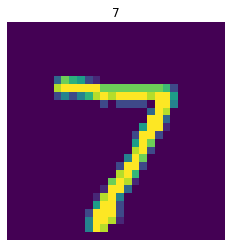

k-anonymity not verified!
Start anonymization with k = 2 and gen = 1...
Anonymization example:


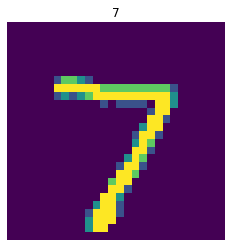

Anonymized 0 images


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


k-anonymity not verified!
Start anonymization with k = 2 and gen = 2...
Anonymization example:


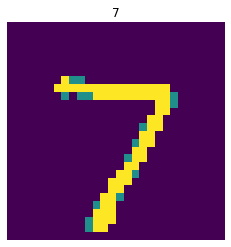

Anonymized 0 images
Anonymized 1000 images
Anonymized 2000 images
k-anonymity not verified!
Start anonymization with k = 2 and gen = 3...
Anonymization example:


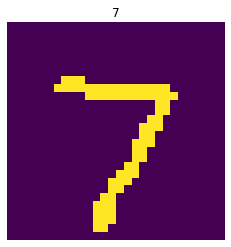

Anonymized 0 images
Anonymized 1000 images
Anonymized 2000 images
Anonymized 3000 images
Anonymized 4000 images
Anonymized 5000 images
Anonymized 6000 images
Anonymized 7000 images
Anonymized 8000 images
Anonymized 9000 images
[[ 605   41    0    0   23    4    2   87   10  208]
 [   0 1119    0    0    0    0    0    5   10    1]
 [  29  411    3    0   96    1    8  301   45  138]
 [  26  225    0    0   17    1   10  353   61  317]
 [  10   48    0    0  336    0    5   15    2  566]
 [  23   41    0    0   14  121   20   32  155  486]
 [ 100  123    0    0  198    4  229   32   57  215]
 [   7  225    0    0    6    5    0  529   14  242]
 [  59  192    0    0    7    4   10   36  390  276]
 [  11   43    0    0   16    1    1   17    9  911]]
Accuracy of the CNN: 0.4243
Start anonymization with k = 5 and gen = 0...
Anonymization example:


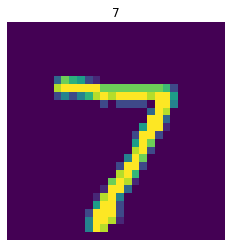

k-anonymity not verified!
Start anonymization with k = 5 and gen = 1...
Anonymization example:


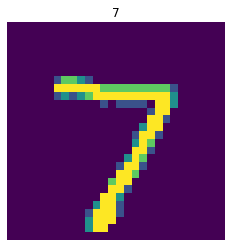

Anonymized 0 images


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


k-anonymity not verified!
Start anonymization with k = 5 and gen = 2...
Anonymization example:


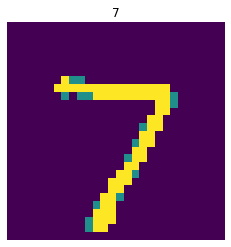

Anonymized 0 images
k-anonymity not verified!
Start anonymization with k = 5 and gen = 3...
Anonymization example:


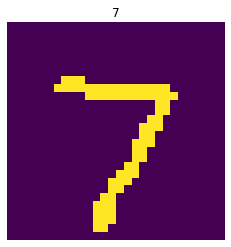

Anonymized 0 images
Anonymized 1000 images
Anonymized 2000 images
Anonymized 3000 images
Anonymized 4000 images
Anonymized 5000 images
Anonymized 6000 images
Anonymized 7000 images
Anonymized 8000 images
Anonymized 9000 images
[[ 605   41    0    0   23    4    2   87   10  208]
 [   0 1119    0    0    0    0    0    5   10    1]
 [  29  411    3    0   96    1    8  301   45  138]
 [  26  225    0    0   17    1   10  353   61  317]
 [  10   48    0    0  336    0    5   15    2  566]
 [  23   41    0    0   14  121   20   32  155  486]
 [ 100  123    0    0  198    4  229   32   57  215]
 [   7  225    0    0    6    5    0  529   14  242]
 [  59  192    0    0    7    4   10   36  390  276]
 [  11   43    0    0   16    1    1   17    9  911]]
Accuracy of the CNN: 0.4243
Start anonymization with k = 10 and gen = 0...
Anonymization example:


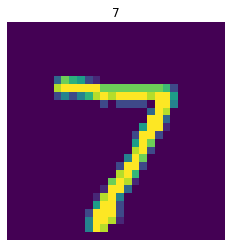

k-anonymity not verified!
Start anonymization with k = 10 and gen = 1...
Anonymization example:


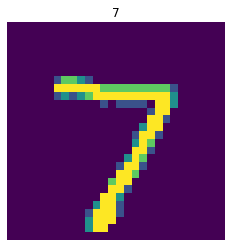

Anonymized 0 images


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


k-anonymity not verified!
Start anonymization with k = 10 and gen = 2...
Anonymization example:


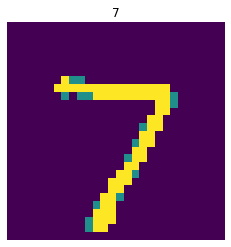

Anonymized 0 images
k-anonymity not verified!
Start anonymization with k = 10 and gen = 3...
Anonymization example:


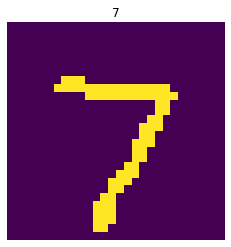

Anonymized 0 images
Anonymized 1000 images
Anonymized 2000 images
Anonymized 3000 images
Anonymized 4000 images
Anonymized 5000 images
Anonymized 6000 images
Anonymized 7000 images
Anonymized 8000 images
Anonymized 9000 images
[[ 605   41    0    0   23    4    2   87   10  208]
 [   0 1119    0    0    0    0    0    5   10    1]
 [  29  411    3    0   96    1    8  301   45  138]
 [  26  225    0    0   17    1   10  353   61  317]
 [  10   48    0    0  336    0    5   15    2  566]
 [  23   41    0    0   14  121   20   32  155  486]
 [ 100  123    0    0  198    4  229   32   57  215]
 [   7  225    0    0    6    5    0  529   14  242]
 [  59  192    0    0    7    4   10   36  390  276]
 [  11   43    0    0   16    1    1   17    9  911]]
Accuracy of the CNN: 0.4243
Start anonymization with k = 20 and gen = 0...
Anonymization example:


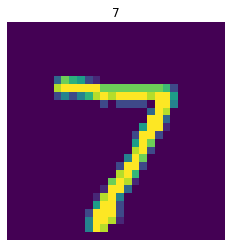

k-anonymity not verified!
Start anonymization with k = 20 and gen = 1...
Anonymization example:


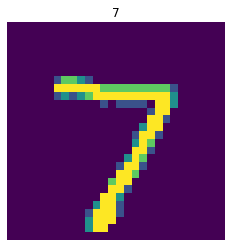

k-anonymity not verified!
Start anonymization with k = 20 and gen = 2...
Anonymization example:


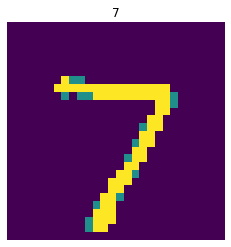

k-anonymity not verified!
Start anonymization with k = 20 and gen = 3...
Anonymization example:


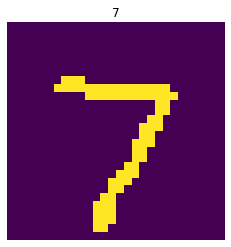

Anonymized 0 images


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Anonymized 1000 images
Anonymized 2000 images
Anonymized 3000 images
k-anonymity not verified!


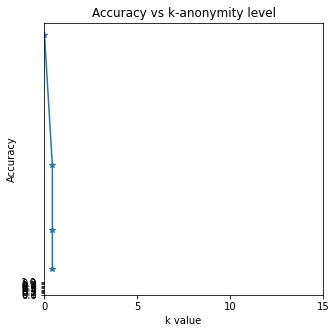

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

gen_dict = {0:['0.0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.7-0.8','0.8-0.9','0.9-1.0'], 
            1:['0.0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1.0'], 
            2:['0.0-0.33','0.33-0.66','0.66-1.0'],
            3:['0.0-0.5','0.5-1.0']}

def anonymize_dataset(data, gen_level, k):
    gen_lower_bound = []
    gen_upper_bound = []
    gen_mean = []
    for gen in gen_dict[gen_level]:
        lb = float(gen.split('-')[0])
        ub = float(gen.split('-')[1])
        gen_lower_bound.append(lb)
        gen_upper_bound.append(ub)
        gen_mean.append(round(np.mean([lb,ub]),3))
    img_anon_list = []
    labels_anon_list = []
    check_k_anon = False
    for n, (images, labels) in enumerate(data):
        img = images.numpy()
        img = img.reshape(28,28)
        img = pd.DataFrame(img)
        img = img.apply(pd.to_numeric)
        # print('before')
        # print(img)
        # plt.imshow(img)
        # plt.title('%d' % labels)
        # plt.axis('off')
        # plt.show()
        #mean_list = img.mean(axis=0).to_list()
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                for l in range(0,len(gen_upper_bound)):
                    val_act_pos = round(img.loc[i,j],3)
                    if gen_lower_bound[l] <= val_act_pos < gen_upper_bound[l]:
                        img.loc[i,j] = gen_mean[l]
                        break
                    elif val_act_pos == 1.0:
                        img.loc[i,j] = gen_mean[len(gen_upper_bound)-1]
                        break
        if n == 0:
            print(f"Start anonymization with k = {k} and gen = {gen_level}...")
            print('Anonymization example:')
            # print(img)
            # print(img.groupby(img.columns.tolist(),as_index=False).size())
            plt.imshow(img)
            plt.title('%d' % labels)
            plt.axis('off')
            plt.show()
        img_numpy = img.to_numpy()
        unique, counts = np.unique(img_numpy, return_counts=True)
        if all(c >= k for c in counts):
            img_anon_list.append(img_numpy)
            labels_anon_list.append(labels)
        else:
            print('k-anonymity not verified!')
            break
        if(n%1000 == 0):
            print(f'Anonymized {n} images')
        if n == (np.shape(data)[0]-1):
            check_k_anon=True
    
    if check_k_anon == True:
        tensor_img_anon = torch.Tensor(np.array(img_anon_list))
        tensor_img_anon = np.reshape(tensor_img_anon, (np.shape(data)[0],1,28,28))
        tensor_labels_anon = torch.Tensor(np.array(labels_anon_list))

        anon_data = TensorDataset(tensor_img_anon, tensor_labels_anon)
        return anon_data
    else:
        return None

possible_gen = [0,1,2,3]
possible_k = [2,5,10,20]
acc_list = [0,0,0,0]
for n, k in enumerate(possible_k):
    acc = 0
    for gen in possible_gen:
        anon_test_data = anonymize_dataset(test_data,gen,k)
        if anon_test_data != None:
            from torch.utils.data import DataLoader
            anon_test_data_loader = DataLoader(anon_test_data,
                                            batch_size = 100,
                                            shuffle = True,
                                            num_workers = 1)
            
            actual_y_test = []
            predicted_y_test = []
            with torch.no_grad():
                for (images, labels) in anon_test_data_loader:
                    images, labels = images.to(device), labels.to(device)
                    test_output = cnn(images)
                    pred_y = torch.max(test_output,1)[1].data.squeeze()
                    actual_y_test += labels.tolist()
                    predicted_y_test += pred_y.tolist()
            print(confusion_matrix(actual_y_test,predicted_y_test))
            acc_tmp = accuracy_score(actual_y_test,predicted_y_test)
            print(f"Accuracy of the CNN: {acc_tmp}")
            if acc_tmp >= acc:
                acc = acc_tmp
                acc_list[n] = acc
        else:
            continue

plt.figure(figsize=(5,5))
plt.plot(possible_k, acc_list, "*-")
plt.yticks(np.arange(0, 1.0, step=0.1))
plt.xticks(np.arange(0, 22, step=2))
plt.title(f"Accuracy vs k-anonymity level")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

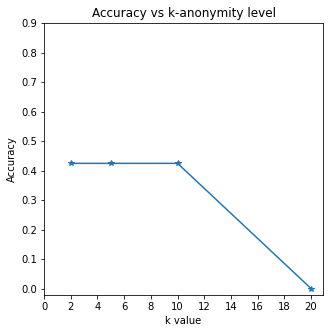

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(possible_k, acc_list, "*-")
plt.yticks(np.arange(0, 1.0, step=0.1))
plt.xticks(np.arange(0, 22, step=2))
plt.title(f"Accuracy vs k-anonymity level")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()